<a href="https://colab.research.google.com/github/AhmadFirmanto/Statistik/blob/main/anova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.formula.api import ols # uji anova (R style)
from statsmodels.stats.anova import anova_lm # uji anova_2
import random

# data

In [2]:
# n = 30

data_a = np.array([random.choice(range(60, 85)) for i in range(30)])
data_b = np.array([random.choice(range(65, 90)) for i in range(30)])
data_c = np.array([random.choice(range(70, 95)) for i in range(30)])

data = pd.DataFrame({'A' : data_a, 'B' : data_b, 'C' : data_c})
data

,A,B,C
0,70,85,79
1,84,75,93
2,60,85,91
3,79,72,80
4,67,86,77
5,72,70,89
6,74,83,76
7,78,74,76
8,77,86,87
9,79,80,72


In [3]:
# variable

A = data_a
B = data_b
C = data_c

In [4]:
A

array([70, 84, 60, 79, 67, 72, 74, 78, 77, 79, 76, 70, 80, 68, 78, 60, 79,
       83, 75, 82, 72, 79, 64, 81, 80, 60, 62, 78, 80, 71])

# anova

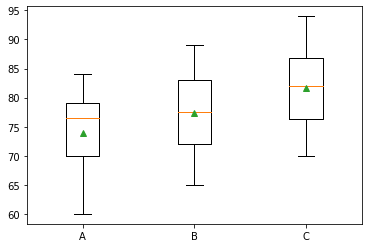

In [5]:
# distribusi data/ persebaran varian

plt.boxplot([A, B, C], labels=['A', 'B', 'C'], showmeans=True);

In [6]:
# uji anova

stats.f_oneway(A, B, C)

F_onewayResult(statistic=9.262523279690559, pvalue=0.0002254867139304758)

* p-value (0.0002) < alpha (0.05)
* tolak H0
* kelompok berbeda secara signifikan 
* antar kelompok berpengaruh

In [7]:
# merubah data grup di satukan
# data sejenis 

anova = pd.melt(data, var_name='kualitatif', value_name='kuantitatif')
anova

,kualitatif,kuantitatif
0,A,70
1,A,84
2,A,60
3,A,79
4,A,67
...,...,...
85,C,87
86,C,72
87,C,77
88,C,94


In [8]:
# uji anova

anova_2 = ols(formula='kuantitatif ~ kualitatif', data=anova).fit()
print(anova_2.summary())

                            OLS Regression Results                            
Dep. Variable:            kuantitatif   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     9.263
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           0.000225
Time:                        05:41:37   Log-Likelihood:                -300.51
No. Observations:                  90   AIC:                             607.0
Df Residuals:                      87   BIC:                             614.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          73.9333      1.267     

* df residual = df within = varian dalam  
* df model = df betwen = varian luar
* p value(0.00025)
* f-statik (9.26)

In [9]:
# uji anova lainya

anova_3 = anova_lm(anova_2)
anova_3

,df,sum_sq,mean_sq,F,PR(>F)
kualitatif,2.0,891.8,445.90000,9.262523,0.000225
Residual,87.0,4188.2,48.14023,NaN,NaN


* df within = 87
* df bitwin = 2
